In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 12: Probabilities

## Review of Control Statements

Here's a simple example to remind you of the `if` statement syntax:

In [ ]:
def sign(x):
    if x < 0:
        # Run this block if x < 0 is True
        return 'negative'
    elif x > 0:
        # Run this block if x < 0 is False and x > 0 is True
        return 'positive'
    else:
        # Run this block if x < 0 is False and x > 0 is False
        return 'zero'

In [ ]:
sign(1)

In [ ]:
sign(-1)

In [ ]:
sign(0)

Here's a simple example to remind you of the `for` loop syntax:

In [ ]:
# We can define for loops over lists and arrays:
rodents = ['mouse', 'capybara', 'marmot']

for pet in rodents:
    # This indented block of code is repeated, assigning each entry of rodents to pet
    message = 'I love my ' + pet
    print(message)

## Appending to Arrays and Tables

In [ ]:
x = np.arange(1, 5)
x

In [ ]:
y = np.arange(5, 10)
y

Add an element to an existing array using `np.append`:

In [ ]:
np.append(x, 5)

Remember that append returns a new array; it doesn't modify `x`:

In [ ]:
x

We can also append two arrays:

In [ ]:
np.append(x, y)

**Tables also have an `append` method, which works a bit differently!** 

If `t` is a table, and `L` is a list, then `t.append(L)` will try to add `L` as an additional row of the table.

In [ ]:
# Start a table of UC campuses
uc_campuses = Table().with_columns(
    'Campus', make_array('Santa Barbara', 'Irvine', 'Santa Cruz'),
    'Undergrads', make_array(23196, 29449, 17864),
    'Beach?', make_array(True, False, False))
uc_campuses

Use the table `append` method to add a new campus:

In [ ]:
uc_campuses.append(['Davis', 31657, False])

Unlike for arrays, `append` actually does modify the table calling it. No need to use `uc_campuses = uc_campuses.append(...)`!

In [ ]:
uc_campuses

## Review of `np.random.choice`

In [27]:
# You cast Meteor Swarm and must roll 20 d6 for fire damage:
six_sided_die = np.arange(1, 7)
rolls = np.random.choice(six_sided_die, 20)
rolls

array([2, 2, 5, 6, 6, 3, 5, 4, 4, 5, 6, 1, 3, 1, 3, 6, 2, 4, 4, 4])

In [30]:
# You must flip a coin
coin = make_array('heads', 'tails')
np.random.choice(coin)

'heads'

## Example: Simulating Coin Tosses

Suppose that we toss a coin 100 times. How many times do we end up with heads?

In [ ]:
# We can use the np.random.choice function to simulate 10 coin flips
np.random.choice(coin, 10)

In [ ]:
# ...or 100 coin flips.
# Remember that summing an array of boolean values returns the number of Trues in the array!
sum(np.random.choice(coin, 100) == 'heads')

The number of heads can vary quite widely. Let's repeat this experiment many times, and examine the distribution for the number of heads each trial.

In [ ]:
def num_heads():
    """
    Simulate 100 coin tosses and count the number of heads.
    """
    return sum(np.random.choice(coin, 100) == 'heads')

In [ ]:
# Decide how many times you want to repeat the experiment
repetitions = 10000

In [ ]:
# Simulate the outcomes
outcomes = make_array()  # Define an empty array to store the outcome of each experiment
for i in np.arange(repetitions): # Repeat the experiment several times with a for loop
    outcomes = np.append(outcomes, num_heads()) # Save the results by appending them to the array

In [ ]:
# Plot a histogram with the distribution of outcomes
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(29.5, 70.6))

In [ ]:
# Is this what we would expect?
np.average(outcomes)

## Monty Hall

Let's write code to simulate one game. The first step of the game is that the contestant picks a door. Since the prize behind each door is random, we can use the `np.random.choice` function to randomly select which prize is behind the door that the contestant picks:

In [31]:
doors = make_array('car', 'first goat', 'second goat')
contestant_choice = np.random.choice(doors)
contestant_choice

'car'

Next, the host reveals a goat behind one of the remaining doors. If the first goat is behind the contestant's door, then the host reveals the second goat, and so the remaining door has the car:

In [34]:
# Possibility 1:
if contestant_choice == 'first goat':
    monty_choice = 'second goat'
    remaining_door = 'car' # Contestant wins if they switch doors

Similarly, if the second goat is behind the contestant's door, then the host reveals the first goat, and once again the remaining door has the car:

In [36]:
# Possibility 2:
if contestant_choice == 'second goat':
    monty_choice = 'first goat'
    remaining_door = 'car' # Contestant wins if they switch doors

But if the car is behind the contestant's door, the host randomly picks one of the goats to reveal, and so the remaining door has the other goat:

In [39]:
# Possibility 3:
if contestant_choice == 'car': 
    monty_choice = np.random.choice(['first goat', 'second goat'])
    if monty_choice == 'first goat':
        remaining_door = 'second goat' # Contestant loses if they switch doors
    if monty_choice == 'second goat':
        remaining_door = 'first goat' # Contestant loses if they switch doors

Depending on the value of `contestant_choice` at the start of this section, one of the cells above will have defined `monty_choice` and `remaining_door`. Let's see the outcome of this particular game!

In [40]:
# What prize is behind the contestant's original door?
contestant_choice

'car'

In [41]:
# Which goat did the host reveal?
monty_choice

'first goat'

In [42]:
# What prize is behind the remaining door?
remaining_door

'second goat'

### Simulating Many Games

In order to decide if switching is a good strategy, we can't just simulate a single game---we have to study the outcomes of many games. Since we will be repeating the steps above many times, it will be helpful to encapsulate them in a function:

In [43]:
def monty_hall():
    """
    Simulate one Monty Hall game.
    Returns a list containing:
        1. what was behind the contestant's original door
        2. what was behind the door the host opened
        3. what was behind the remaining door
    """
    
    # Step 1: the contestant picks a door
    # Since the goats / car are randomly assigned, it is reasonable
    # to assume this choice is random
    contestant_choice = np.random.choice(doors)
    
    # Step 2: the host opens one of the other two doors, to reveal a goat
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'car': 
        monty_choice = np.random.choice(['first goat', 'second goat'])
        if monty_choice == 'first goat':
            remaining_door = 'second goat'
        if monty_choice == 'second goat':
            remaining_door = 'first goat'
        
    return [contestant_choice, monty_choice, remaining_door]

Now we can simulate an entire Monty Hall game in a single line! Refer to the docstring in the `monty_hall` function see how to interpret the first, second, and third elements of this list.

In [52]:
monty_hall()

['car', 'first goat', 'second goat']

Before we simulate may games, we need to create an empty data structure to store all of the results. We could use an array here, but since we are storing many values per game, it will be easier to use a table.

In [53]:
# First, create an empty table to store results from each simulated game
games = Table(['Original Door', 'Revealed', 'Remaining'])
games

Original Door,Revealed,Remaining


In [56]:
game_1 = monty_hall()
game_1

['first goat', 'second goat', 'car']

In [57]:
game_2 = monty_hall()
game_2

['second goat', 'first goat', 'car']

In [58]:
# We can use the append table method to add new rows to the table
games.append(game_1)
games.append(game_2)
games

Original Door,Revealed,Remaining
first goat,second goat,car
second goat,first goat,car


Now we use a `for` loop to simulate the game many times!

In [59]:
# Reset the table of outcomes
games = Table(['Original Door', 'Revealed', 'Remaining'])
for i in range(1000):
    game_i = monty_hall()
    games.append(game_i)
    
games

Original Door,Revealed,Remaining
first goat,second goat,car
second goat,first goat,car
first goat,second goat,car
first goat,second goat,car
first goat,second goat,car
second goat,first goat,car
first goat,second goat,car
car,second goat,first goat
car,second goat,first goat
first goat,second goat,car


In [61]:
# Use the group method to count how many times the car appears behind the original door...
original = games.group('Original Door')
original

Original Door,count
car,341
first goat,315
second goat,344


In [62]:
# ...and the remaining door
remaining = games.group('Remaining')
remaining

Remaining,count
car,659
first goat,175
second goat,166


From the `car` rows, we see that the car is behind the original door $\frac 1 3$ of the time, and behind the remaining door $\frac 2 3$ of the time. Switching is a better strategy!

Use the `join` method to consolidate the outcomes into one table and visualize:

In [63]:
joined = original.join('Original Door', remaining, 'Remaining')
joined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
joined

Item,Original Door,Remaining Door
car,341,659
first goat,315,175
second goat,344,166


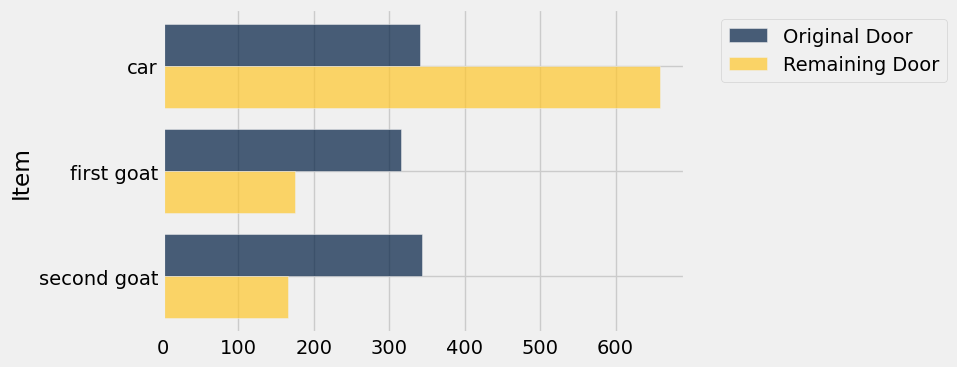

In [64]:
joined.barh('Item')